In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [48]:
from google.colab import files
Uploaded=files.upload()

Saving Iris1.csv to Iris1 (2).csv


In [49]:
df = pd.read_csv("Iris1.csv")
iris = load_iris()

In [50]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
LE = LabelEncoder()

In [54]:
df["target"] = LE.fit_transform(df.Species)

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [56]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [57]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
y = df.target

In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,6.7,3.1,4.7,1.5
16,5.4,3.9,1.3,0.4
61,5.9,3.0,4.2,1.5
14,5.8,4.0,1.2,0.2
35,5.0,3.2,1.2,0.2


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model = DecisionTreeClassifier()

In [65]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
y_predicted = model.predict(X_test)

In [67]:
model.score(X_test,y_test)

0.9666666666666667

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cf = confusion_matrix(y_test,y_predicted)
cf

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]])

In [70]:
import seaborn as sb

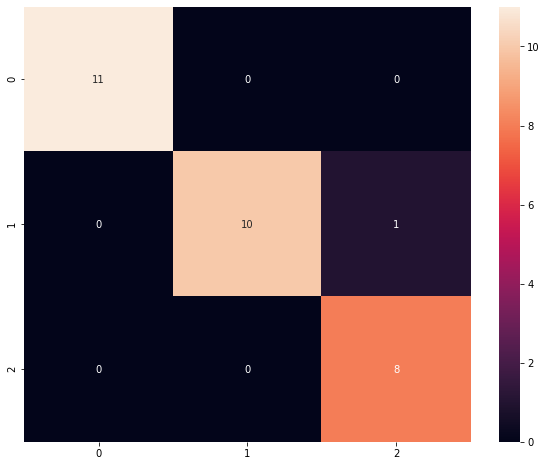

In [71]:
plt.figure(figsize=(10,8))
sb.heatmap(cf,annot=True)

In [72]:
df1 = df[df.target==0]

In [73]:
df2 = df[df.target==1]

In [74]:
df3 = df[df.target==2]
df3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
101,102,5.8,2.7,5.1,1.9,Iris-virginica,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2


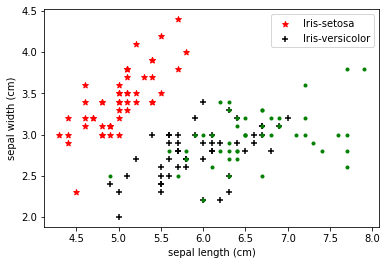

In [75]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='red',marker='*')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='black',marker='+')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='green',marker='.')
plt.legend(['Iris-setosa','Iris-versicolor']);

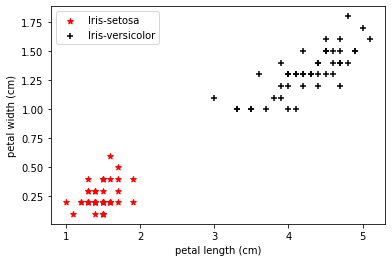

In [76]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='red',marker='*')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='black',marker='+')
plt.legend(['Iris-setosa','Iris-versicolor']);

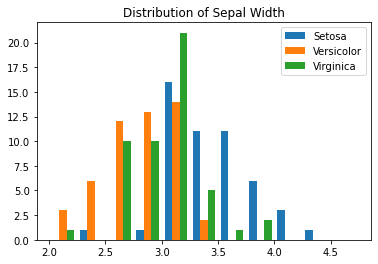

In [77]:
import numpy as np
plt.title('Distribution of Sepal Width');
plt.hist([df1['SepalWidthCm'], df2['SepalWidthCm'], df3['SepalWidthCm']], 
         bins=np.arange(2,5,0.25), 
         stacked=False);
plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [78]:
pip install pydotplus

In [79]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


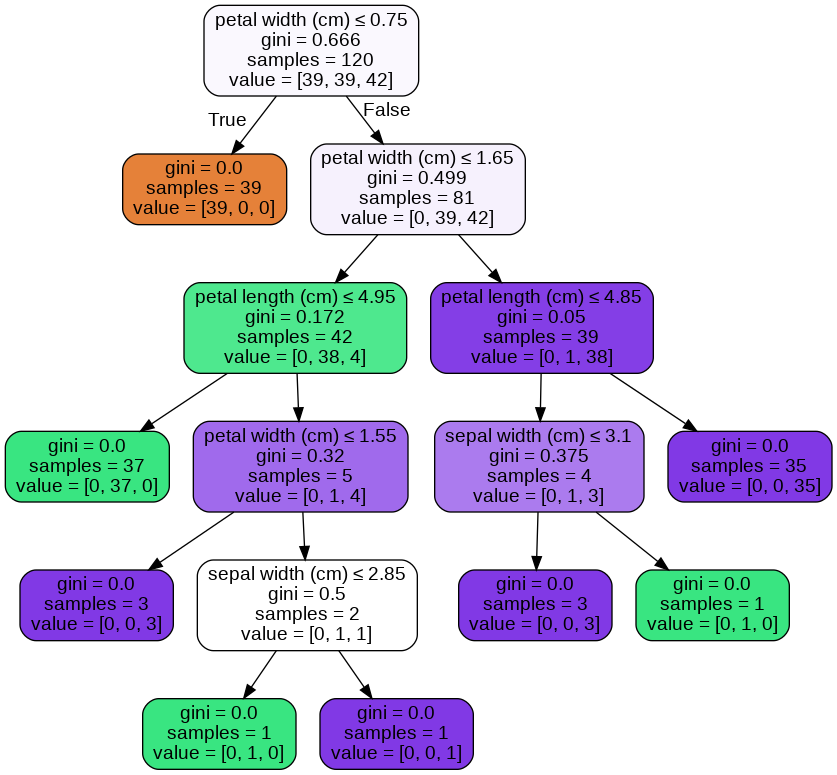

In [80]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
import pickle
print("[INFO] Saving model...")
saved_model=pickle.dump(model,open('/content/drive/My Drive/iris_model.pkl', 'wb'))

[INFO] Saving model...


In [84]:
model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 0])

In [85]:
import joblib
filename = '/content/drive/My Drive/iris.sav'
joblib.dump(model, filename)


['/content/drive/My Drive/iris.sav']

In [86]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9666666666666667


In [90]:
!pip install streamlit



In [91]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!pip install pyngrok

In [108]:
!ngrok authtoken 1tcSDKNHf56uChGfo16x2VAtZQl_5y1GPbfxnUSdFJicFzSuJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [109]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/iris_model.pkl', 'rb'))
iris = load_iris()
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Spark Foundation</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Iris</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Flower Name</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Iris Classification ")
    activities=['Predict']
    option=st.sidebar.selectbox('Which model would you like to use?',activities)
    st.subheader(option)
    sl=st.slider('Select Sepal Length', 0.0, 10.0)
    sw=st.slider('Select Sepal Width', 0.0, 10.0)
    pl=st.slider('Select Petal Length', 0.0, 10.0)
    pw=st.slider('Select Petal Width', 0.0, 10.0)
    inputs=[[sl,sw,pl,pw]]

    if st.button("Classify"):
        if option=='Predict':
            st.success(classify(model.predict(inputs)))

    if st.button("About"):
      st.header("By Hritwick Goyal")
      st.subheader("Intern , The Spark Foundation")
    html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">Iris Classifier</p></center> 
    </div>
    </div>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
if __name__=='__main__':
  main()

Overwriting app.py


In [110]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://982bb7378ae0.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-06-07 12:21:27.885 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.243.129.110:80

